<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Decision Tree Regression

In this notebook we will learn how to use decision trees for regression tasks using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
# ! pip install scikit-learn matplotlib numpy

We are going to use a synthetic dataset generated from sinus curve with some added noise.

In [2]:
import numpy as np
np.random.seed(0)

# X is our input data for training
X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
# y is the target variable
y_train = np.sin(X_train).ravel()
# Add noise to targets
y_train[::5] += 1 * (0.5 - np.random.rand(8))


X_test = np.linspace(0, 5, 500)[:, np.newaxis]

Now we create an instance of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html"><code>sklearn.tree.DecisionTreeRegressor</code></a> class specifiying the maximum allowed depth of the tree <code>max_depth</code>, and fit the model to our training data with the <code>fit()</code> method. 

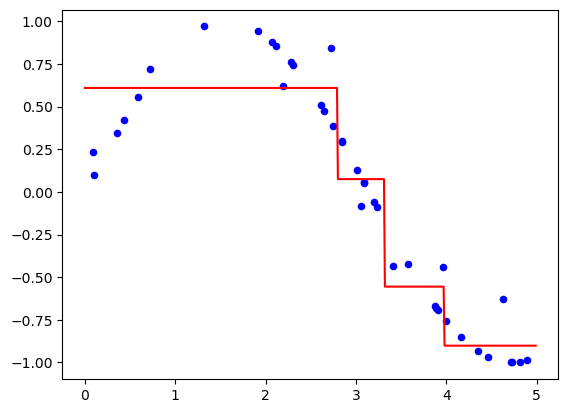

In [3]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = regr.predict(X_test)

# plot the regression model
import matplotlib.pylab as plt
plt.scatter(X_train, y_train, s=20, c="blue", label="data")
plt.plot(X_test, y_test, color="red")

Optionally we can plot the learned decision tree as follows:

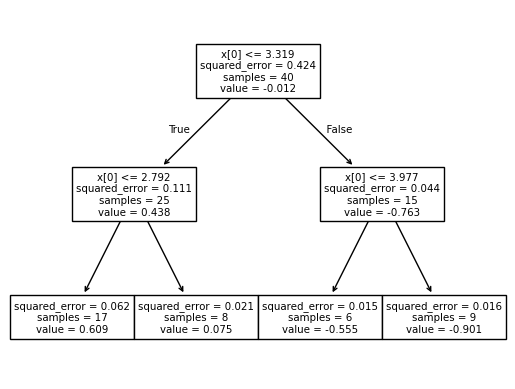

In [4]:
from sklearn.tree import plot_tree
plot_tree(regr)
plt.show()

Let's visualize the output regression for different values of <code>max_depth</code>:

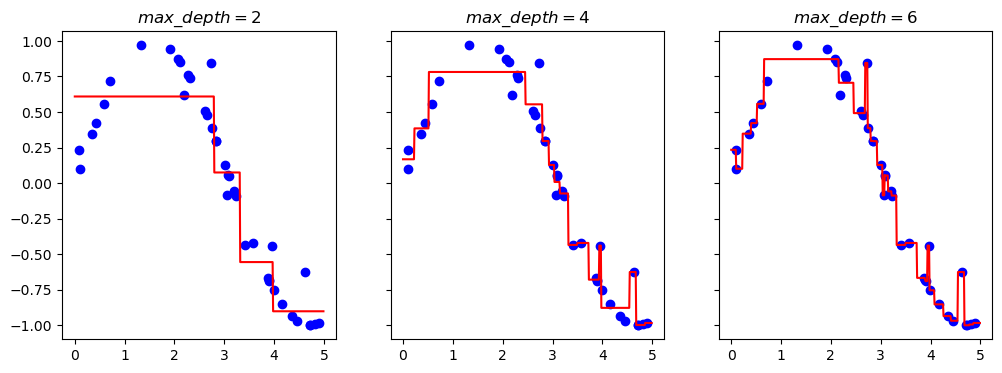

In [5]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

for i, max_depth in enumerate([2,4,6]):

    regr = DecisionTreeRegressor(max_depth=max_depth)
    regr.fit(X_train, y_train)
    y_test = regr.predict(X_test)

    ax[i].scatter(X_train, y_train, color='blue')
    ax[i].plot(X_test, y_test, color='red')
    ax[i].set_title(r'$max\_depth=%d$'%max_depth)

### EXERCISE

Use the <code>DecisionTreeRegressor</code> in the boston house-price dataset and compare its performance with the <code>LinearRegression</code> and <code>KNeighborsRegressor</code> in both the univariate and multivariate cases.